This file contains a version of Jakub Mikula's original Rosenthal solution MATLAB code rewritten in python. This process was completed by Ryan Mueller.

In [ ]:
#Rosenthal's Solution:
#Input Parameters:
T0  = 300;             # ambient temperature [K]
q   = 840;             # laser power [W]
k   = 35;              # conductivity coefficient [W/(m*K)]
v   = 1000/1000/60;    # laser speed [m/s]
cp  = 800;             # specific heat [J/(kg*K)]
rho = 7600.0;          # density [kg/(m^3)]

A mesh of the plate needs to be completed to collect data. A mesh can be formed in Python using the NumPy package. Linspace, meshgrid, and contour can be utilized once the NumPy package in imported

In [ ]:
import numpy as np

nx = 1000; #number of x grid points
ny = 1000; #number of y grid points

xi = -1;   #initial x value [m]
xf =  1;   #final   x value [m]
yi = -1;   #initial y value [m]
yf =  1;   #final   y value [m]

[x,y] = np.meshgrid(np.linspace(xi,xf,nx)/5, np.linspace(xi,yf,ny)/5);


Now that a mesh has been created for the plate and all input parameters have been entered. The Rosenthal solution can be applied to the mesh. Fetures like sqrt, pi, and exp can be accessed through the Math package.

In [ ]:
import math 

T = np.zeros((nx,ny))

for i in range(nx):
  for j in range(ny):
    a = k/rho/cp;
    w = x[i][j];
    R = math.sqrt((w**2)+((y[i][j])**2));
    T[i][j] = T0+q/2/math.pi/k/R*math.exp(-v*(w+R)/2/a);

Now that the temperature profile of the plate has been calculated, a contour graph can be used to show the heat trasfer. To access contour plots and formatting options for the plots, the matplot package is needed. 

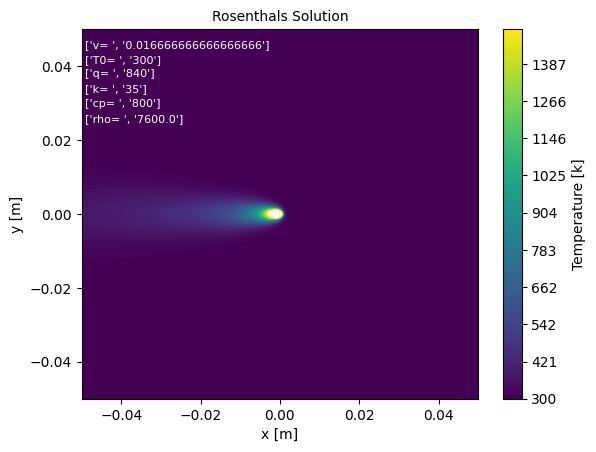

In [ ]:
import matplotlib.pyplot as plt

Level_Step = 150;
Max_Level = 1500;

plt.rcParams.update({'text.color': "Black"})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Rosenthals Solution',fontsize='medium')
T_Cont = ax.contourf(x, y,T,np.linspace(T0,Max_Level,Level_Step))
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_xlim(-0.05,0.05)
ax.set_ylim(-0.05,0.05)

plt.colorbar(T_Cont,label = 'Temperature [k]', orientation="vertical")

plt.rcParams.update({'text.color': "white"})
ax.text(0.01, 0.95,['v= ', str(v)], transform=ax.transAxes,fontsize=8)
ax.text(0.01, 0.91,['T0= ', str(T0)], transform=ax.transAxes,fontsize=8)
ax.text(0.01, 0.87,['q= ', str(q)], transform=ax.transAxes,fontsize=8)
ax.text(0.01, 0.83,['k= ', str(k)], transform=ax.transAxes,fontsize=8)
ax.text(0.01, 0.79,['cp= ', str(cp)], transform=ax.transAxes,fontsize=8)
ax.text(0.01, 0.75,['rho= ', str(rho)], transform=ax.transAxes,fontsize=8)

plt.show()